In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import skimage.io
import os

# Project info

In [3]:
# TAORF: 41744,"d24",5
#PROJECT_ROOT = "/raid/data/cellpainting/TAORF/"
#channels = ["ER", "Mito", "DNA"]

# BBBC021: "Week1_22123","B04","s3"
PROJECT_ROOT = "/raid/data/bbbc021-DP/"
channels = ["DNA", "Tubulin", "Actin"]


In [4]:
PLATE = "Week1_22141"
WELL = "B11"
SITE = "s3"

box_size = 96

# Read metadata

In [5]:
meta = pd.read_csv(os.path.join(PROJECT_ROOT, "outputs/compressed/metadata/compressed.csv"))

m1 = meta["Metadata_Plate"] == PLATE
m2 = meta["Metadata_Well"] == WELL
m3 = meta["Metadata_Site"] == SITE
meta[m1 & m2 & m3]

,Unnamed: 0,ID,Metadata_Plate,Metadata_Well,Metadata_Site,Plate_Map_Name,DNA,Tubulin,Actin,Replicate,Compound_Concentration,compound,concentration,moa,replicate_use
1094,1094,1094,Week1_22141,B11,s3,Week1,Week1_22141/Week1_150607_B11_s3_w1F7CE60A2-6E9...,Week1_22141/Week1_150607_B11_s3_w25C504BDC-11C...,Week1_22141/Week1_150607_B11_s3_w444B9FB6B-228...,2,taxol_0.3,taxol,0.3,Microtubule stabilizers,Training


# Read image channels

In [6]:
imgs = []
for k,r in meta[m1 & m2 & m3].iterrows():
    for ch in channels:
        im = skimage.io.imread(os.path.join(PROJECT_ROOT, "outputs/compressed/images/", r[ch]))
        imgs.append(im[:,:,np.newaxis])
im = np.concatenate(imgs, axis=2)

# Read cell locations

In [7]:
try:
    locfile = "inputs/locations/{}/{}-{}-Nuclei.csv".format(PLATE, WELL, SITE)
    locs = pd.read_csv(os.path.join(PROJECT_ROOT, locfile))
except:
    locs = pd.DataFrame()
    print("File not found")

# Display image

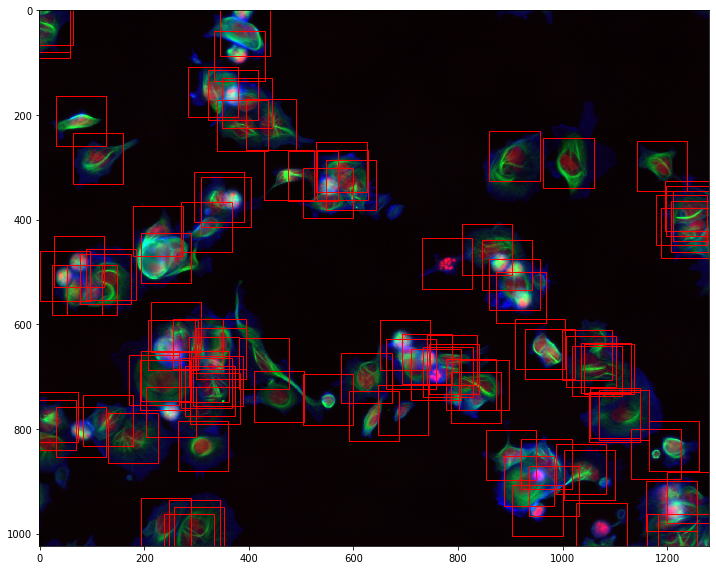

In [8]:
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(im)
for k,r in locs.iterrows():
    rect = patches.Rectangle(
        (r.Nuclei_Location_Center_X - box_size/2,r.Nuclei_Location_Center_Y - box_size/2),
        box_size, box_size, linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
plt.show()